In [1]:

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, norm, t


In [2]:
# Load the cleansed dataset
file_path = 'Cleansed_Telco_Customer_Churn.csv'
churn_df = pd.read_csv(file_path)

In [3]:
# Display the first few rows of the dataset
print("Dataset Overview:\n", churn_df.head())

Dataset Overview:
    gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   
1    Male              0      No         No      34          Yes   
2    Male              0      No         No       2          Yes   
3    Male              0      No         No      45           No   
4  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1            

In [4]:

# 1. Understanding the Business Workflow
# Data Flow Diagram (DFD) - Descriptive Analysis
# - Identify data sources (e.g., customer data, transaction data, churn status)
# - Define data-driven artifacts to be integrated (e.g., ML models, dashboards)
# - Outline expected outcomes for each data flow component


In [5]:

# 2. Data Properties and Relationships Analysis
# Descriptive statistics for numeric columns
print("\nDescriptive Statistics:\n", churn_df.describe())



Descriptive Statistics:
        SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    7043.000000  7043.000000     7043.000000   7043.000000
mean        0.162147    32.371149       64.761692   2281.916928
std         0.368612    24.559481       30.090047   2265.270398
min         0.000000     0.000000       18.250000     18.800000
25%         0.000000     9.000000       35.500000    402.225000
50%         0.000000    29.000000       70.350000   1397.475000
75%         0.000000    55.000000       89.850000   3786.600000
max         1.000000    72.000000      118.750000   8684.800000


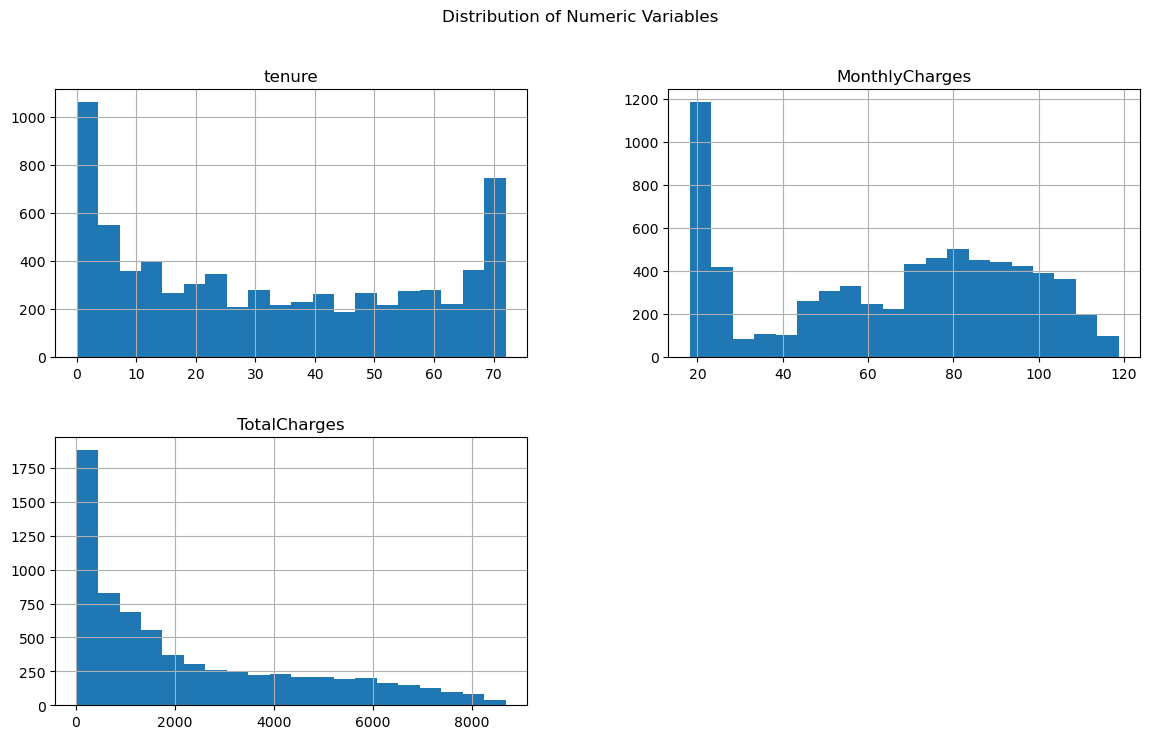

In [6]:
# Visualize distribution of numeric variables
numeric_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']
churn_df[numeric_columns].hist(bins=20, figsize=(14, 8))
plt.suptitle("Distribution of Numeric Variables")
plt.show()


In [7]:
# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(churn_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


ValueError: could not convert string to float: 'Female'

<Figure size 1000x800 with 0 Axes>

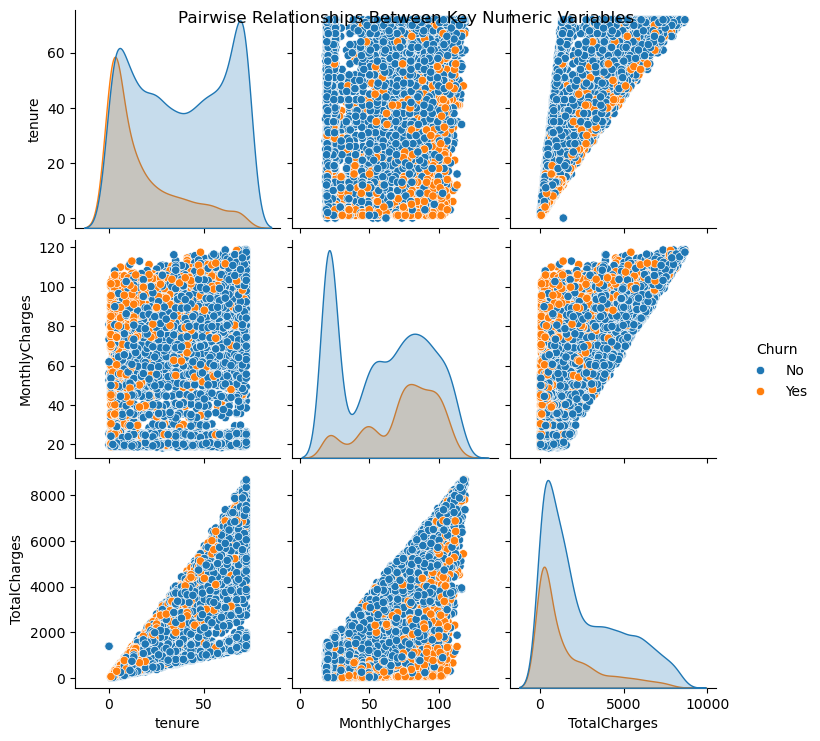

In [8]:

# Pairwise relationships analysis
sns.pairplot(churn_df, vars=numeric_columns, hue='Churn')
plt.suptitle("Pairwise Relationships Between Key Numeric Variables")
plt.show()

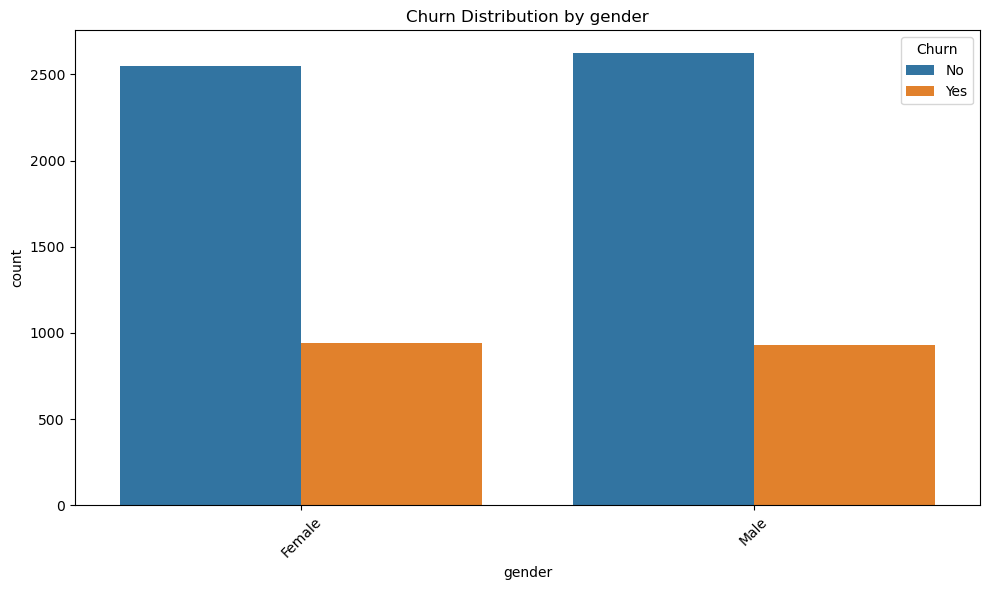

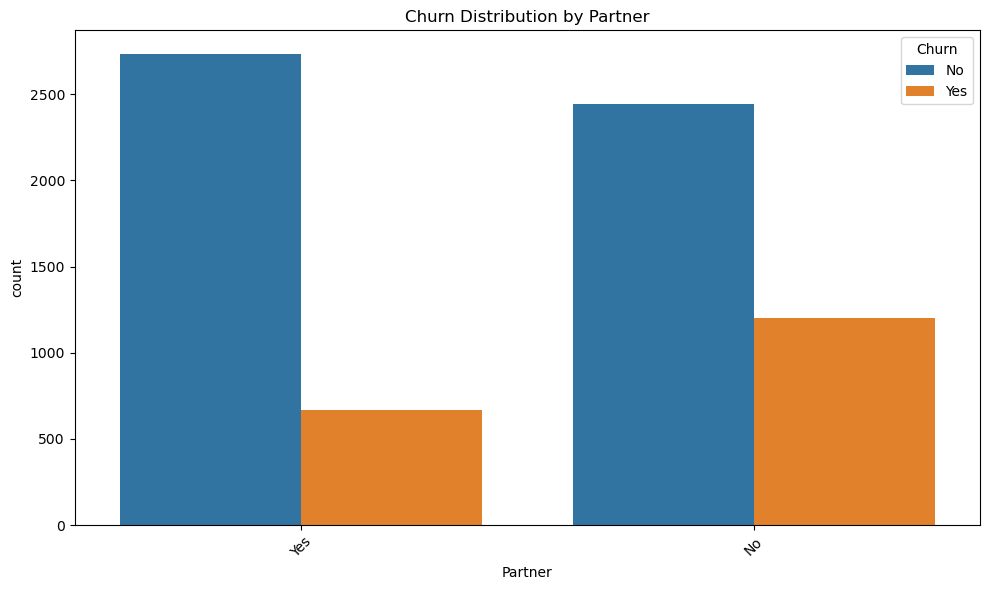

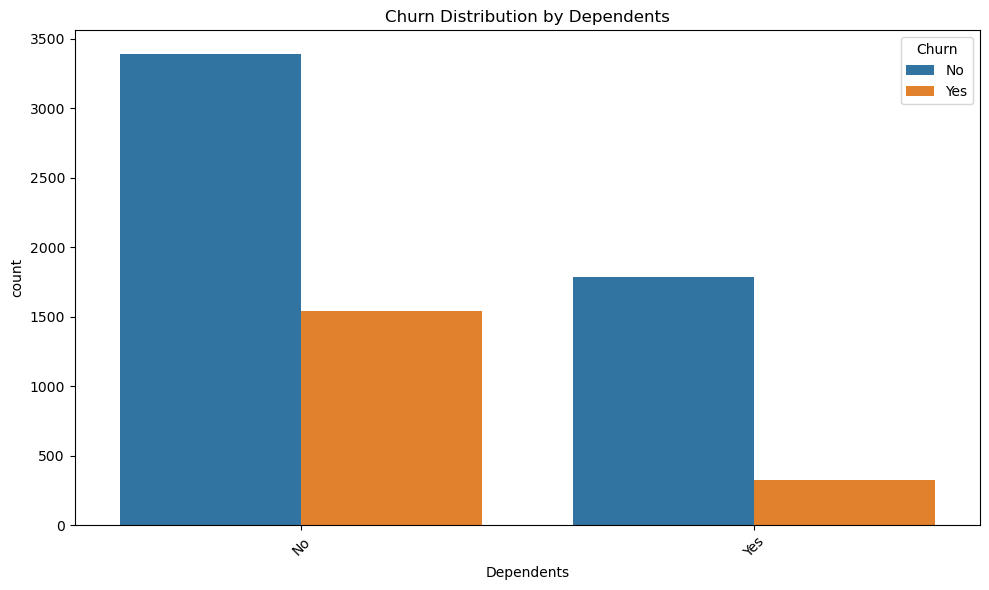

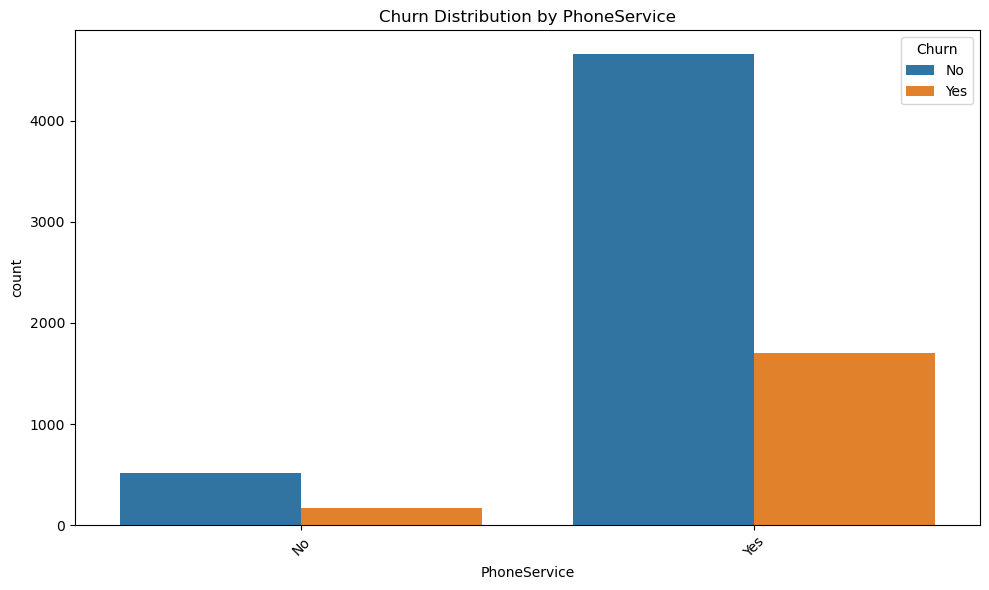

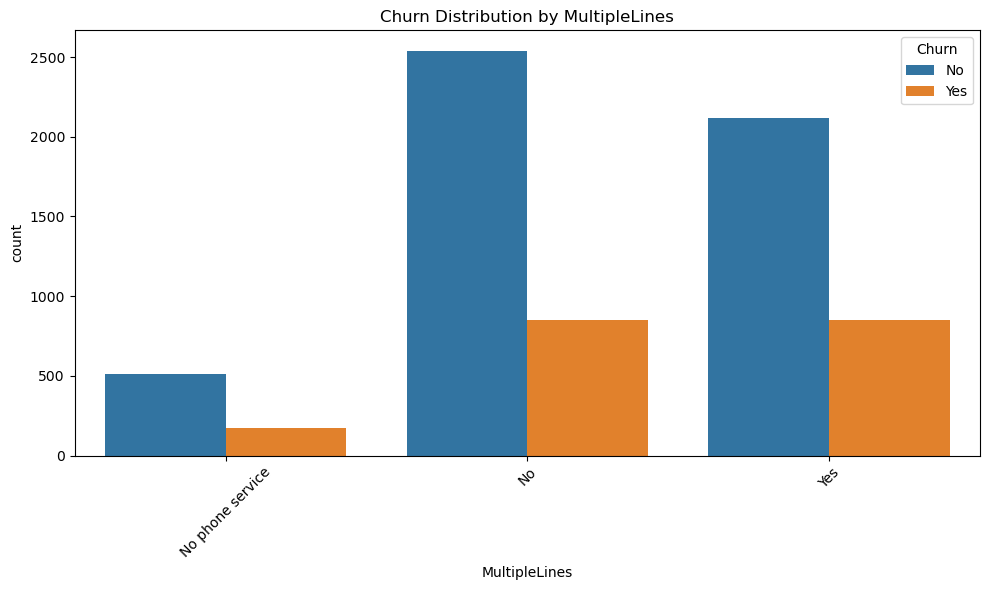

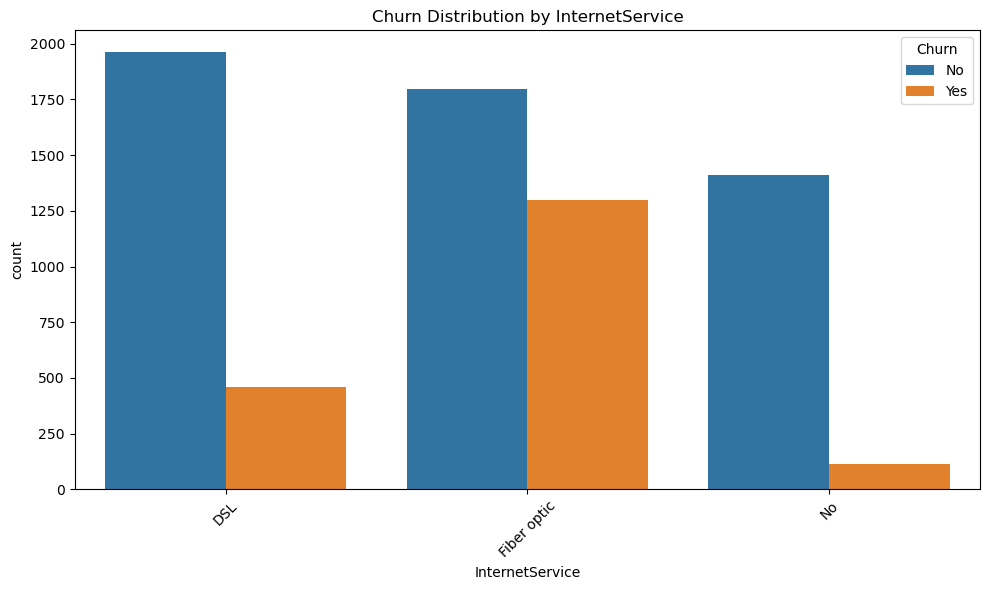

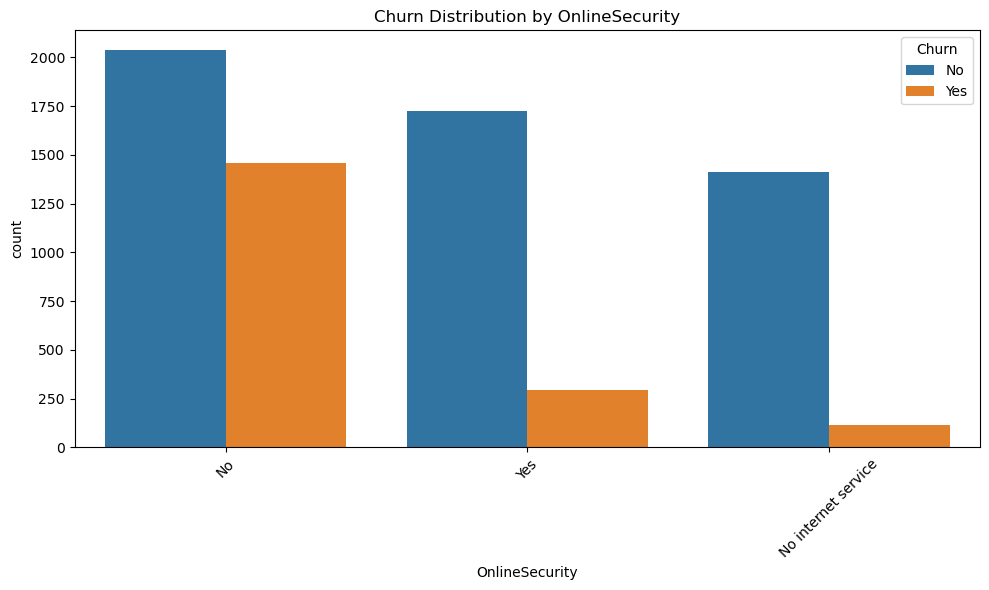

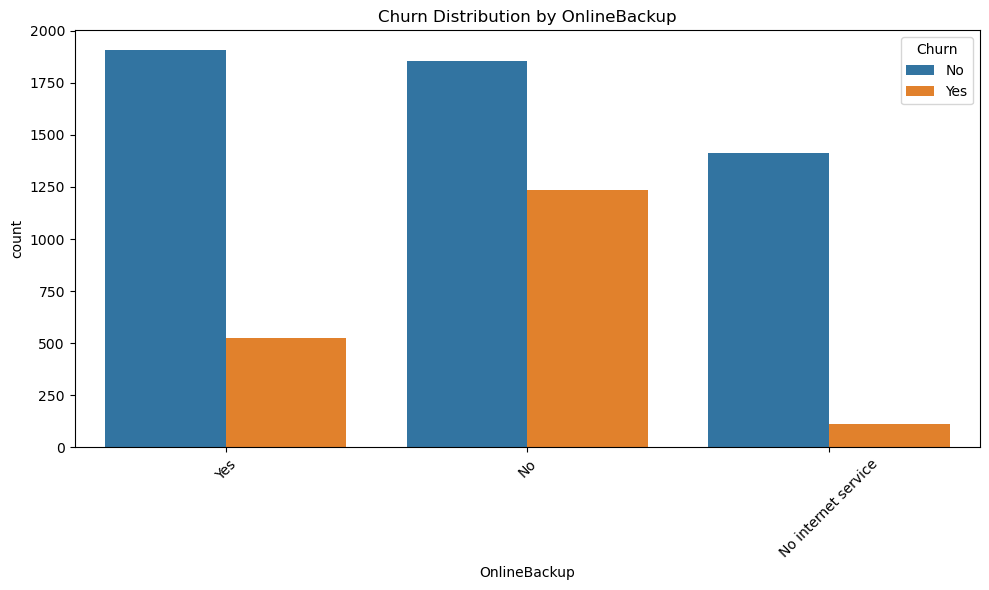

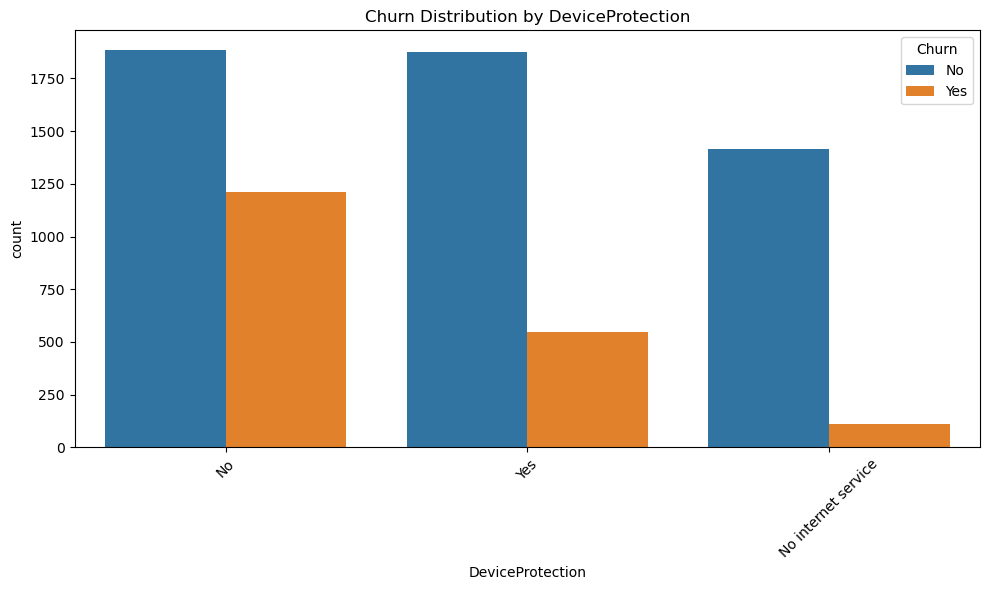

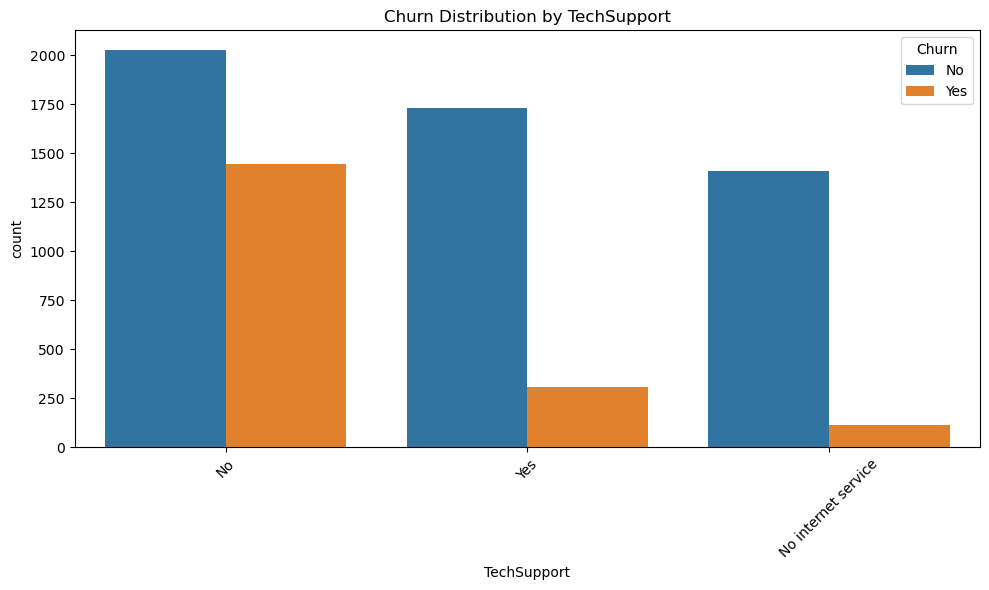

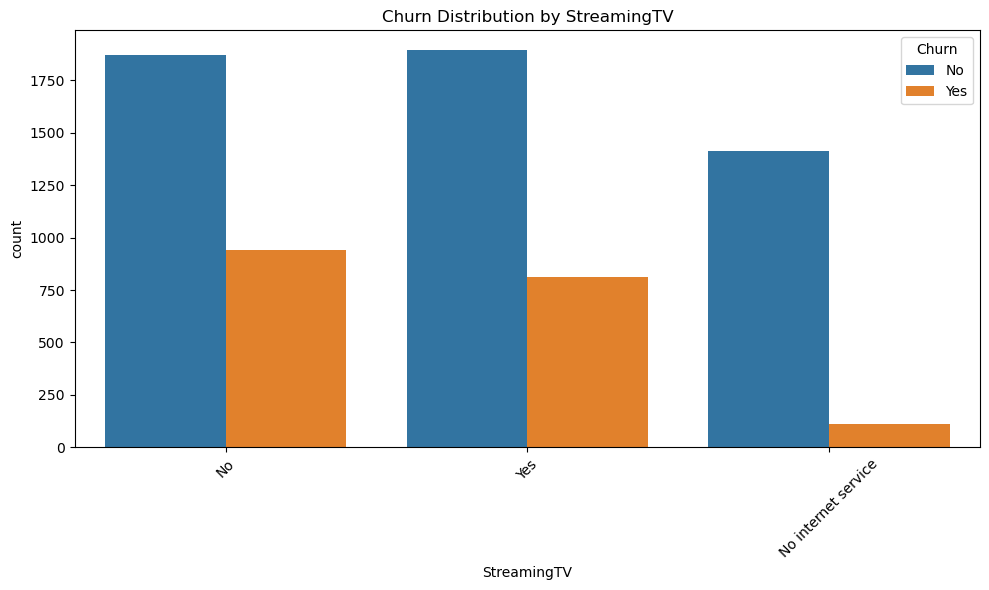

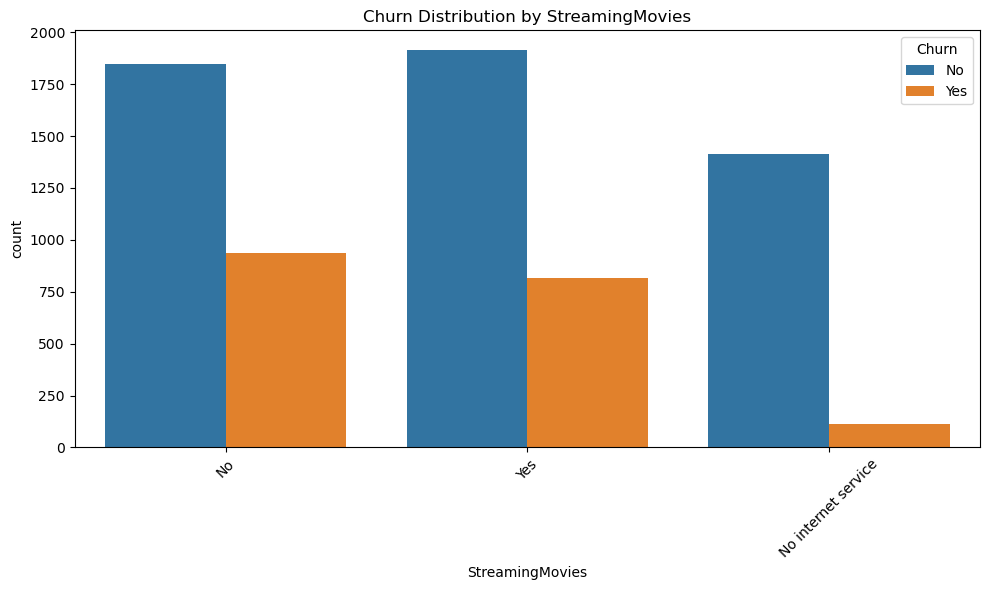

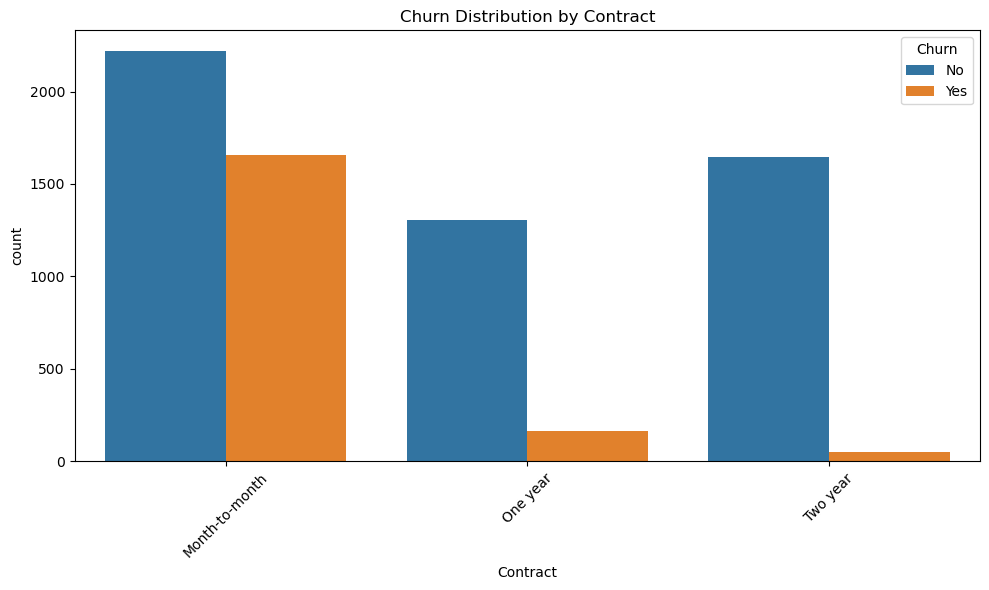

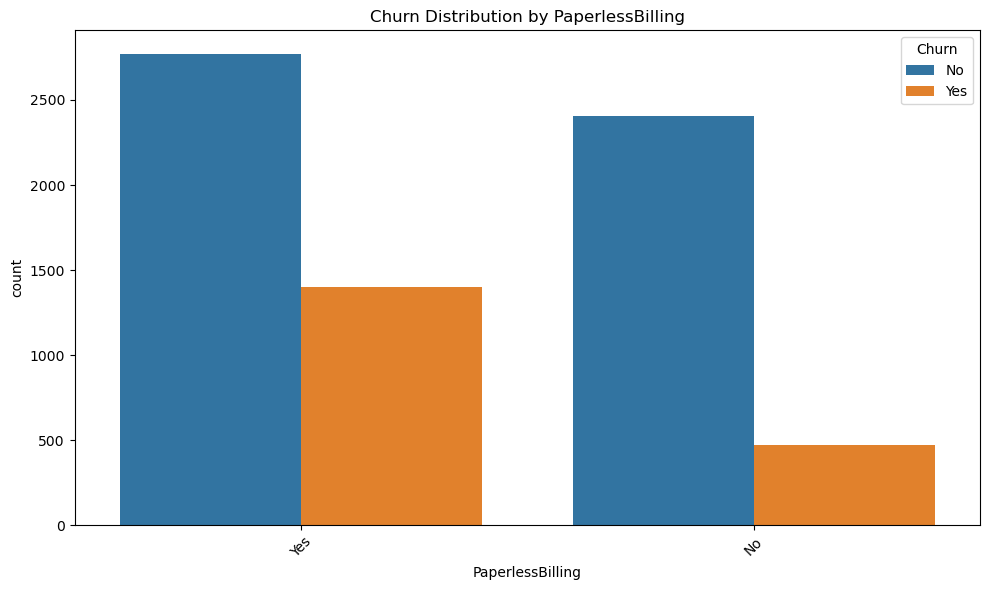

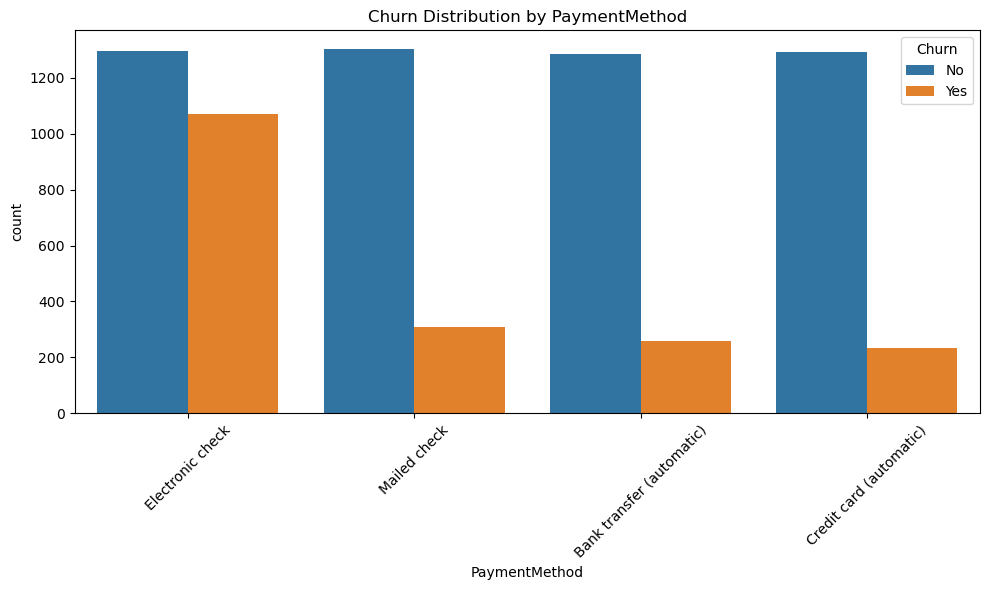

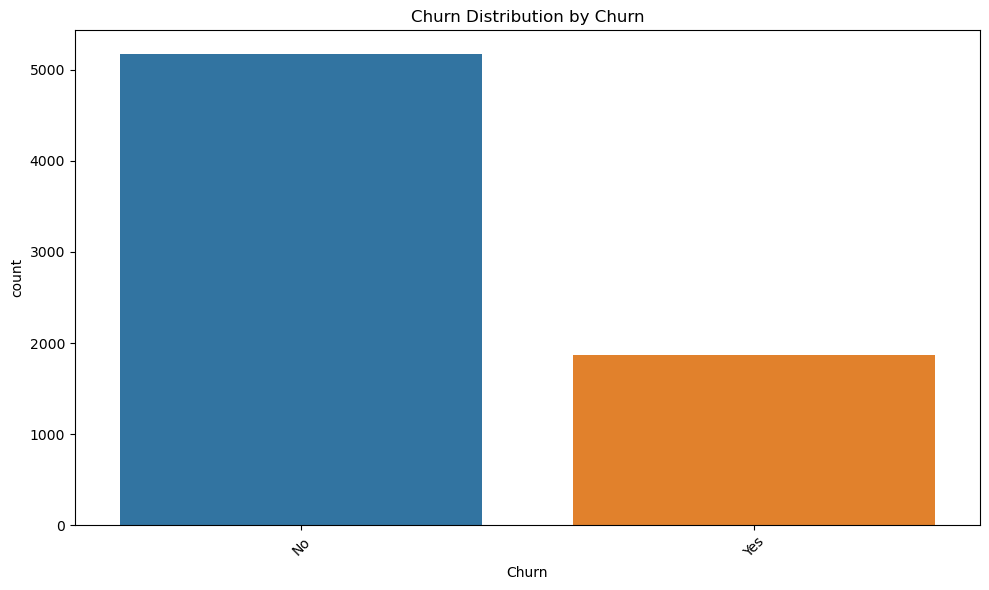

In [9]:
# Categorical analysis
categorical_columns = churn_df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, data=churn_df, hue='Churn')
    plt.title(f"Churn Distribution by {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [10]:
# 3. Hypothesis Testing
# Hypothesis: Customers with higher MonthlyCharges are more likely to churn
churn_yes = churn_df[churn_df['Churn'] == 'Yes']['MonthlyCharges']
churn_no = churn_df[churn_df['Churn'] == 'No']['MonthlyCharges']

In [11]:
# Conduct a t-test
t_stat, p_value = ttest_ind(churn_yes, churn_no)
print(f"T-Test for MonthlyCharges (Churn vs Non-Churn): T-statistic = {t_stat:.4f}, P-value = {p_value:.4f}")

T-Test for MonthlyCharges (Churn vs Non-Churn): T-statistic = 16.5367, P-value = 0.0000


In [12]:
# 99% Confidence Interval
mean_diff = churn_yes.mean() - churn_no.mean()
se_diff = np.sqrt((churn_yes.var() / len(churn_yes)) + (churn_no.var() / len(churn_no)))
conf_interval = t.interval(0.99, df=len(churn_yes) + len(churn_no) - 2, loc=mean_diff, scale=se_diff)
print(f"99% Confidence Interval for MonthlyCharges Difference: {conf_interval}")


99% Confidence Interval for MonthlyCharges Difference: (11.331915866893988, 15.020501268790602)


In [13]:
# 4. Additional Statistical Analysis
# Analysis of TotalCharges based on Churn
churn_yes_tc = churn_df[churn_df['Churn'] == 'Yes']['TotalCharges']
churn_no_tc = churn_df[churn_df['Churn'] == 'No']['TotalCharges']


In [14]:

# T-test and confidence interval for TotalCharges
t_stat_tc, p_value_tc = ttest_ind(churn_yes_tc, churn_no_tc)
print(f"T-Test for TotalCharges (Churn vs Non-Churn): T-statistic = {t_stat_tc:.4f}, P-value = {p_value_tc:.4f}")

mean_diff_tc = churn_yes_tc.mean() - churn_no_tc.mean()
se_diff_tc = np.sqrt((churn_yes_tc.var() / len(churn_yes_tc)) + (churn_no_tc.var() / len(churn_no_tc)))
conf_interval_tc = t.interval(0.99, df=len(churn_yes_tc) + len(churn_no_tc) - 2, loc=mean_diff_tc, scale=se_diff_tc)
print(f"99% Confidence Interval for TotalCharges Difference: {conf_interval_tc}")

T-Test for TotalCharges (Churn vs Non-Churn): T-statistic = -17.0423, P-value = 0.0000
99% Confidence Interval for TotalCharges Difference: (-1161.2645945334582, -880.9082055340898)
